In [29]:
#bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/WoolfVirginia1882-1941'
bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/ShakespeareWilliam1564-1616'

In [30]:
import folium #https://anaconda.org/conda-forge/folium
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  

In [31]:
url = 'https://bnb.data.bl.uk/sparql'

#duda 1) no entiendo esta parte de la query: ?resource ?p <{0}>
#duda 2) dct, schema, blt, c4dm, schema sí se usan, ¿es necesario poner todos los demás prefijos?
#duda 3) ¿qué es query.format()?

query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
PREFIX bio: <http://purl.org/vocab/bio/0.1/>
PREFIX blt: <http://www.bl.uk/schemas/bibliographic/blterms#>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX isbd: <http://iflastandards.info/ns/isbd/elements/>
PREFIX org: <http://www.w3.org/ns/org#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdau: <http://rdaregistry.info/Elements/u/>
PREFIX madsrdf: <http://www.loc.gov/mads/rdf/v1#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX void: <http://rdfs.org/ns/void#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX umbel: <http://umbel.org/umbel#>
PREFIX schema: <http://schema.org/>
PREFIX c4dm: <http://purl.org/NET/c4dm/event.owl#>

SELECT DISTINCT ?resource ?title ?date ?place WHERE {{
   graph <http://bnb.data.bl.uk/id/graph/BNBCIP> {{
      ?resource ?p <{0}> ;
         dct:title ?title ;
         schema:datePublished ?date .
      OPTIONAL {{
          ?resource blt:projectedPublication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
      OPTIONAL {{
          ?resource blt:publication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
   }}
}} LIMIT 500
"""

query = query.format(bnbIdAuthor) #aquí se pone el autor

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query}, headers=headers)
print('Elements retrieved!')

Elements retrieved!


In [27]:
query

'\nPREFIX bibo: <http://purl.org/ontology/bibo/>\nPREFIX bio: <http://purl.org/vocab/bio/0.1/>\nPREFIX blt: <http://www.bl.uk/schemas/bibliographic/blterms#>\nPREFIX dct: <http://purl.org/dc/terms/>\nPREFIX event: <http://purl.org/NET/c4dm/event.owl#>\nPREFIX foaf: <http://xmlns.com/foaf/0.1/>\nPREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>\nPREFIX isbd: <http://iflastandards.info/ns/isbd/elements/>\nPREFIX org: <http://www.w3.org/ns/org#>\nPREFIX owl: <http://www.w3.org/2002/07/owl#>\nPREFIX rdau: <http://rdaregistry.info/Elements/u/>\nPREFIX madsrdf: <http://www.loc.gov/mads/rdf/v1#>\nPREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX skos: <http://www.w3.org/2004/02/skos/core#>\nPREFIX void: <http://rdfs.org/ns/void#>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\nPREFIX umbel: <http://umbel.org/umbel#>\nPREFIX schema: <http://schema.org/>\nPREFIX c4dm: <http://purl.org/NET/c4dm/event.owl#>\n\nSELECT DIS

In [28]:
bnbdata = json.loads(r.text)

#csv_out = csv.writer(open('bnb_records_virginia.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
csv_out = csv.writer(open('bnb_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)

csv_out.writerow(['resource', 'place', 'title', 'date'])

for i in bnbdata['results']['bindings']:
    resource = place = title = date =''
    
    resource = i['resource']['value']
    place = i['place']['value']
    title = i['title']['value']
    date = i['date']['value']
    
    csv_out.writerow([resource,place,title,date])

In [32]:
#df = pd.read_csv('bnb_records_virginia.csv')
df = pd.read_csv('bnb_records.csv')

In [33]:
df

,resource,place,title,date
0,http://bnb.data.bl.uk/id/resource/013310275,http://sws.geonames.org/6269131/,Macbeth : teachit KS3 interactive pack,2006-01
1,http://bnb.data.bl.uk/id/resource/013310276,http://sws.geonames.org/6269131/,Much ado about nothing : teachit KS3 interacti...,2006-01
2,http://bnb.data.bl.uk/id/resource/013315368,http://sws.geonames.org/6269131/,Hamlet,2006-01
3,http://bnb.data.bl.uk/id/resource/019599478,http://sws.geonames.org/6269131/,Twelfth night,2020-01
4,http://bnb.data.bl.uk/id/resource/019599479,http://sws.geonames.org/6269131/,The tempest : the alexander text,2019-11
...,...,...,...,...
122,http://bnb.data.bl.uk/id/resource/019702130,http://sws.geonames.org/6269131/,The tragedies,2020-01
123,http://bnb.data.bl.uk/id/resource/019702131,http://sws.geonames.org/6269131/,The tragicomedies,2020-01
124,http://bnb.data.bl.uk/id/resource/019755998,http://sws.geonames.org/6269131/,A midsummer night's dream,2020-06
125,http://bnb.data.bl.uk/id/resource/019736523,http://sws.geonames.org/6252001/,William Shakespeare comedies,2020-05


In [34]:
places_by_number = df.groupby("place")["resource"].count()

In [35]:
places_by_number

place
http://sws.geonames.org/1269750/     2
http://sws.geonames.org/2921044/     9
http://sws.geonames.org/6251999/     2
http://sws.geonames.org/6252001/    30
http://sws.geonames.org/6269131/    84
Name: resource, dtype: int64

In [36]:
places_by_number[['http://sws.geonames.org/6269131/']][0]

84

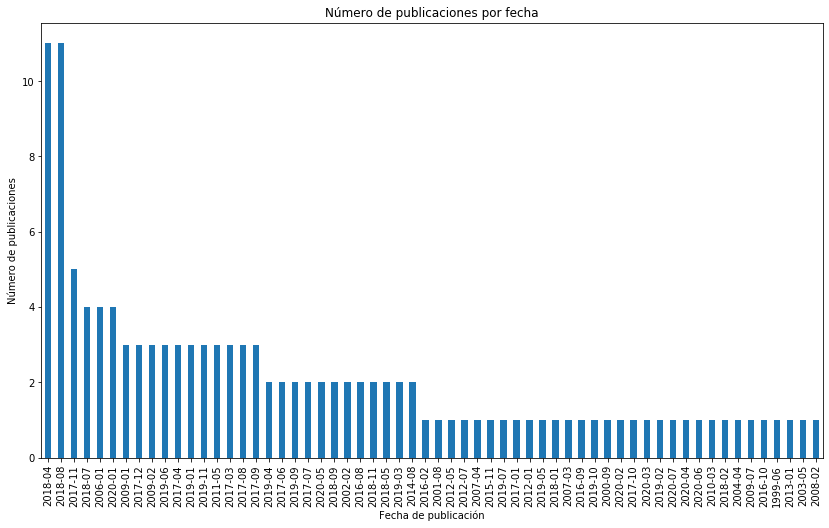

In [55]:
ax = df['date'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de publicaciones por fecha") 
ax.set_xlabel("Fecha de publicación")
ax.set_ylabel("Número de publicaciones")
plt.show()

In [39]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [70]:
df = df.sort_values('year')

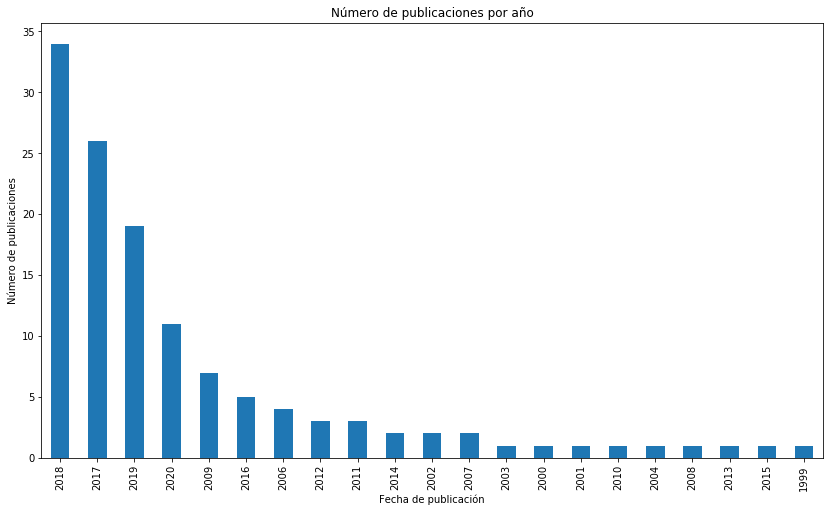

In [71]:
ax = df['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de publicaciones por año") #duda 4) cómo se podrían ordenar por año?
ax.set_xlabel("Fecha de publicación")
ax.set_ylabel("Número de publicaciones")
plt.show()

In [42]:
# Get unique values
places = pd.unique(df['place']).tolist()
strplaces = ''
for a in sorted(places):
    print(a)
    strplaces = strplaces + ' \"' + a.replace("http://sws.geonames.org/", "").replace("/", "") + '\"'

http://sws.geonames.org/1269750/
http://sws.geonames.org/2921044/
http://sws.geonames.org/6251999/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/


In [48]:
strplaces #sólo hay cinco lugares distintos

' "1269750" "2921044" "6251999" "6252001" "6269131"'

In [43]:
url = 'https://query.wikidata.org/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE {{ 
  values ?idgeonames {{ {0} }} 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
}}
"""

query = query.format(strplaces) #aquí se metieron los ids únicos de geonames que en el paso anterior
print(query)

# use json as a result
r = requests.get(url, params = {'format': 'json', 'query': query})
geopoints = r.json()


PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE { 
  values ?idgeonames {  "1269750" "2921044" "6251999" "6252001" "6269131" } 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}



In [44]:
map = folium.Map(location=[0,0], zoom_start=1.5)

for geo in geopoints['results']['bindings']:
    idwikidata = geo['x']['value']
    lat = geo['lat']['value']
    lon = geo['lon']['value']
    idgeonames = geo['idgeonames']['value']
    label = geo['xLabel']['value']
    print(lat, lon)
    
    # adding a text to the popup
    count = places_by_number[['http://sws.geonames.org/' + idgeonames + '/']][0]
    popup = str(count) + " records published in <a hreh='" + str(idwikidata) + "'>" + label + "</a>"
    
    folium.Marker([lat,lon], popup= popup).add_to(map)

51.0 10.0
38.895 -77.036666666667
22.0 77.0
53.0 -1.0
56.0 -109.0


In [45]:
map